In [32]:
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import os
import cv2

In [33]:
path = "./brain_tumor_dataset"
image_paths = list(paths.list_images(path))

In [34]:
images = []
labels = []

for image_path in image_paths:
    label = os.path.basename(os.path.dirname(image_path))
    image = cv2.imread(image_path)
    image = cv2.resize(image,(224,224))
    images.append(image)
    labels.append(label)

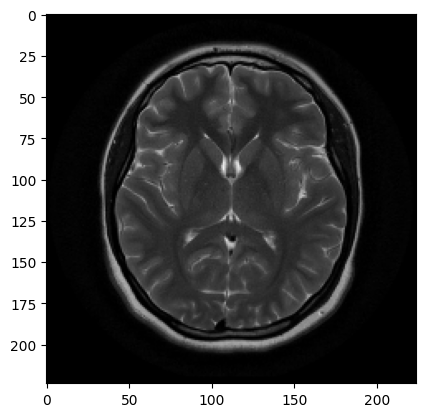

In [35]:
def plot_image(image):
    plt.imshow(image)
plot_image(images[0])

In [36]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
import numpy as np

images = np.array(images)/255.0
labels = np.array(labels)

label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)
labels = to_categorical(labels)

In [37]:
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(
    images,     # The input images (features).
    labels,     # The labels (targets).
    test_size=0.10,  # 10% of the data goes into the test set.
    random_state=42, # Ensures consistent splitting each time the code is run.
    stratify=labels  # Maintains the class distribution across splits.
)

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(fill_mode='nearest',rotation_range=15)

In [39]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet',input_tensor=Input(shape=(224,224,3)),include_top=False)
base_input = base_model.input

In [40]:
base_output = base_model.output
base_output = AveragePooling2D(pool_size=(4, 4))(base_output)
base_output = Flatten(name="flatten")(base_output)
base_output = Dense(64, activation="relu")(base_output)
base_output = Dropout(0.5)(base_output)
base_output = Dense(2, activation="softmax")(base_output)

In [41]:
for layer in base_model.layers:
    layer.trainable = False

In [42]:
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

model = Model(inputs = base_input,outputs = base_output)
model.compile(optimizer=Adam(learning_rate=1e-3), metrics=['accuracy'], loss='binary_crossentropy')

In [43]:
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 1, 1, 512)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 14,747,650 (56.26 MB)

 Trainable params: 32,962 (128.76 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [44]:
batch_size = 8
train_steps = len(X_train) // batch_size
validation_steps = len(X_test) // batch_size
epochs = 10

In [46]:
history = model.fit(
    train_generator.flow(X_train,y_train,batch_size=batch_size),
    steps_per_epoch=train_steps,
    validation_data=(X_test,y_test),
    validation_steps=validation_steps,
    epochs=epochs
)

Epoch 1/10


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 538ms/step - accuracy: 0.5560 - loss: 0.7485 - val_accuracy: 0.6154 - val_loss: 0.6075
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7500 - loss: 0.3282 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/10


c:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


28/28 ━━━━━━━━━━━━━━━━━━━━ 16s 545ms/step - accuracy: 0.5995 - loss: 0.6616 - val_accuracy: 0.6538 - val_loss: 0.5740
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step - accuracy: 0.5000 - loss: 0.3457 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 522ms/step - accuracy: 0.6957 - loss: 0.6139 - val_accuracy: 0.9231 - val_loss: 0.5399
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.6250 - loss: 0.3042 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 524ms/step - accuracy: 0.7524 - loss: 0.5806 - val_accuracy: 0.9231 - val_loss: 0.4916
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.5000 - loss: 0.4406 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 15s 524ms/step - accuracy: 0.7620 - loss: 0.5578 - val_accuracy: 0.9231 - val_loss: 0.4486
Epoch 10/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.7500 - loss: 0.2711 

In [47]:
predictions = model.predict(X_test, batch_size= batch_size)
predictions = np.argmax(predictions, axis= 1)
actuals = np.argmax(y_test, axis= 1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 410ms/step


In [49]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(actuals, predictions, target_names= label_binarizer.classes_))

cm = confusion_matrix(actuals, predictions)
print(cm)

              precision    recall  f1-score   support

          no       1.00      0.80      0.89        10
         yes       0.89      1.00      0.94        16

    accuracy                           0.92        26
   macro avg       0.94      0.90      0.92        26
weighted avg       0.93      0.92      0.92        26

[[ 8  2]
 [ 0 16]]


In [50]:
total = sum(sum(cm))
accuracy = (cm[0, 0] + cm[1, 1]) / total
print("Accuracy: {:.4f}".format(accuracy))

Accuracy: 0.9231


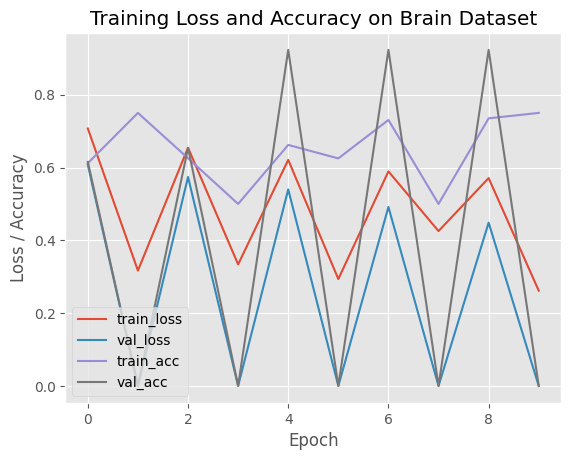

In [51]:
N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label= "train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label= "val_loss")

plt.plot(np.arange(0, N), history.history["accuracy"], label= "train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label= "val_acc")

plt.title("Training Loss and Accuracy on Brain Dataset")
plt.xlabel("Epoch")
plt.ylabel("Loss / Accuracy")
plt.legend(loc= "lower left")
plt.savefig("plot.jpg")